![](https://static.wixstatic.com/media/5b62b0_6b2cf04875324e6abd77b9e6e518aed4~mv2.jpg/v1/crop/x_1269,y_540,w_2943,h_2700/fill/w_185,h_169,al_c,q_80,usm_0.66_1.00_0.01,enc_auto/Final%20PRECISE%20LOGO.jpg)

# Introduction to data science

**I AM A (CODING) NOTEBOOK**

bla bla..


# Table of Contents <a name="toc"></a>
1. [Setting up](#Setting-up)
2. [Explor your data](#explor-your-data)
3. [Some analysis](#some-analysis)
4. [Design the next experiment](#design)

# 1. Setting up <a name="setting-up"></a>
[back up](#toc)

The code below is used to load a set of libraries or extensions to our workspace, which provides with extra functionalities that we will be using for this interactive demo. The command import tells the workspace what to load.

Go ahead and run the chunk of code below. You can pass the mouse over and see a play ▶ button. Click it to run the code.

In [ ]:
library(tidyverse) #for data manipulation/wrangling and other functionalities

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::%||%()   masks base::%||%()
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Next is to load the data into the workspace. Before loading the data so that we can use it in python, the file must be available

> **Upload file**. Go to the folder icon on the left 📁. Then drag the file to upload or go to the upload file icon and select the file that contains your data.

> **Load file into workspace**. The code chunk below loads the file into the workspace. Change the name of the file between " " in the code to get you file loaded!

In [ ]:
barnes_data <- read.csv("Barnes Tidy Data.csv")
head(barnes_data)

,AnimalID,GUID,InjuryGroupAssignTyp,InterventType,InjElapsedTime,TrialNumBMT,LatencyEscapeHolFindDurBMT,searchstrategyBMT,EquipPlatformDiametValBMT,EquipPlatformHeightValBMT,⋯,StartingLocationBMT,TrialTypeBMT,IntervalBetweenAcquisitionTrialsBMT,AcquisitionNumberofDaysBMT,AcquisitiontoProbeIntervalBMT,AnimalSpeedBMT,DistanceTraveledBMT,TargetBoxErrorsPrimaryCtBMT,TargetBoxErrorsTotalCtBMT,LatencyEscapeHolEnterDurBMT
,<chr>,<lgl>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<chr>,<chr>,<int>,<int>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>
1,STBI2,NA,Sham,Sham,8,1,88,3,145,75,⋯,Center,Learning,5,4,0,NA,NA,NA,NA,NA
2,STBI2,NA,Sham,Sham,8,2,27,2,145,75,⋯,Center,Learning,5,4,0,NA,NA,NA,NA,NA
3,STBI2,NA,Sham,Sham,9,1,120,3,145,75,⋯,Center,Learning,5,4,0,NA,NA,NA,NA,NA
4,STBI2,NA,Sham,Sham,9,2,27,2,145,75,⋯,Center,Learning,5,4,0,NA,NA,NA,NA,NA
5,STBI2,NA,Sham,Sham,10,1,16,2,145,75,⋯,Center,Learning,5,4,0,NA,NA,NA,NA,NA
6,STBI2,NA,Sham,Sham,10,2,18,2,145,75,⋯,Center,Learning,5,4,0,NA,NA,NA,NA,NA


**How many unique animals are in the data?**

In [ ]:
unique_animals<-unique(barnes_data$AnimalID)
length(unique_animals)

[1] 60

**How many unique groups are in the data?**

# 2. Explor your data <a name="explor-your-data"></a>
[back up](#toc)

Great, you have loaded the dataset and should be able to see a sample of it in the table above! The next code is used to create an example plot. Let's create one.

>**Create a boxplot**. Run the code bellow to create a boxplot between a categorical variable (x) and a numerical variable (y). In the example bellow, we have ploted the latency escape for sham and TBI animals. Change the name of the variables to plot to create a different one.

In [ ]:
## Using ggplot2 package
ggplot(barnes_data, aes(InjuryGroupAssignTyp, LatencyEscapeHolFindDurBMT))+
  geom_boxplot()

# 3. Some analysis <a name="some-analysis"></a>
[back up](#toc)

Next, we are going to perform a repeated measures ANOVA to determine whether Sham or TBI groups have differences in the latency over repeated times of assessment.

First we check the timepoints and entries:

In [ ]:
## Number of entries per timepoint
table(barnes_data$InjElapsedTime, barnes_data$InjuryGroupAssignTyp)

    
     Sham TBI
  8    32  88
  9    32  88
  10   32  88
  11   32  88

**It seems we have more entries than unique animals!** This is because each animal is tested 2 times each session.

For simplicity, we are going to take the average per animal and timepoint first

In [ ]:
barnes_data_mean_trial<-barnes_data%>%
  group_by(AnimalID, InjElapsedTime)%>%
  summarise(InjuryGroupAssignTyp = unique(InjuryGroupAssignTyp),
            LatencyEscapeHolFindDurBMT_mean = mean(LatencyEscapeHolFindDurBMT, na.rm = T))

head(barnes_data_mean_trial)

`summarise()` has grouped output by 'AnimalID'. You can override using the
`.groups` argument.


AnimalID,InjElapsedTime,InjuryGroupAssignTyp,LatencyEscapeHolFindDurBMT_mean
<chr>,<int>,<chr>,<dbl>
STBI1,8,TBI,38.5
STBI1,9,TBI,79.0
STBI1,10,TBI,18.5
STBI1,11,TBI,26.5
STBI10,8,TBI,95.0
STBI10,9,TBI,300.0


We can confirm running the same code as before

In [ ]:
## Number of entries per timepoint
table(barnes_data_mean_trial$InjElapsedTime, barnes_data_mean_trial$InjuryGroupAssignTyp)

Let's now creat a plot to visualize the data. This is a bit of a complicated code, so don't worry too much, just check the results!

In [ ]:
ggplot(barnes_data_mean_trial, aes(factor(InjElapsedTime), LatencyEscapeHolFindDurBMT_mean, color = InjuryGroupAssignTyp))+
  geom_boxplot()

Warning message:
“Removed 4 rows containing non-finite values (`stat_summary()`).”
Warning message:
“Removed 4 rows containing non-finite values (`stat_summary()`).”


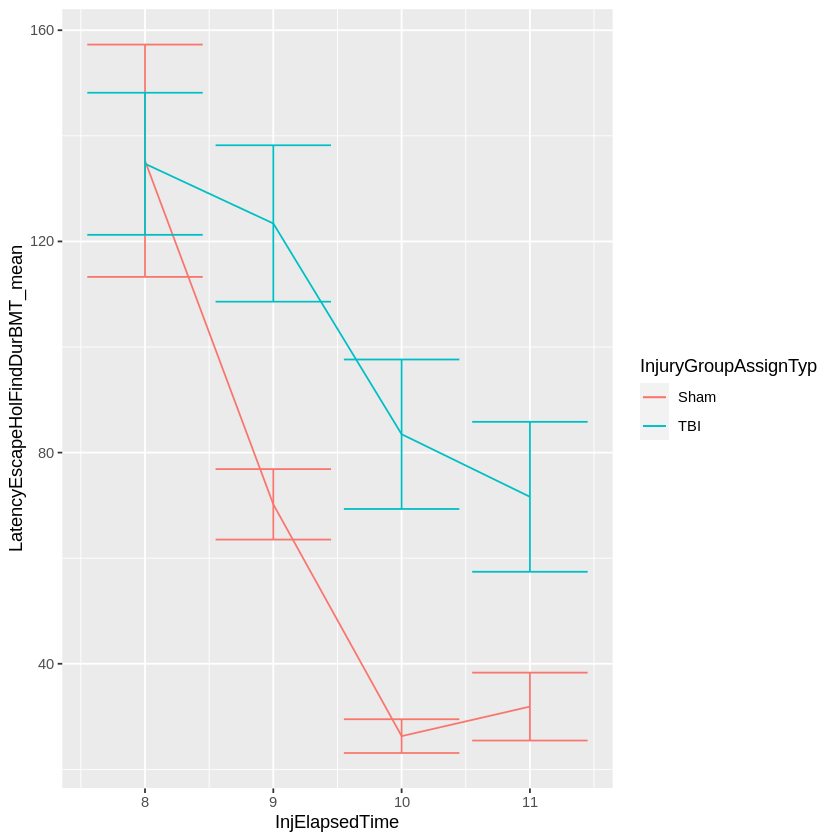

In [ ]:
ggplot(barnes_data_mean_trial, aes(InjElapsedTime, LatencyEscapeHolFindDurBMT_mean, color = InjuryGroupAssignTyp))+
  stat_summary(fun = "mean", geom = "line")+
  stat_summary(fun.data = "mean_se", geom = "errorbar")

So it seems the groups might evolve differently over time. Let's do the proper statistics.

We run an ANOVA model with interaction between time and group and animal as error term. This is called a repeated measures anova!

We first test the normality assumption. The normality assumption can be checked by computing Shapiro-Wilk test for each time point. If the data is normally distributed, the p-value should be greater than 0.05.

In [ ]:
tapply(barnes_data_mean_trial,
interaction(barnes_data_mean_trial$InjElapsedTime,barnes_data_mean_trial$InjuryGroupAssignTyp),
FUN = function(i) shapiro.test(i$LatencyEscapeHolFindDurBMT_mean))

In [ ]:
## Run an ANOVA model with interaction between time and group and animal as error term. This is called a repeated measures anova!
results<-aov(LatencyEscapeHolFindDurBMT_mean~factor(InjElapsedTime)*InjuryGroupAssignTyp+Error(AnimalID), data = barnes_data_mean_trial)

Now we can get the table of results

In [ ]:
summary(results)

# 4. Design the next experiment <a name="design"></a>
[back up](#toc)

Let's imaging that we want to perfom a new experiment where we are looking at a treatment. Our hypothesis is that treatment prevents the lost of learning capacity that occours after TBI. To simplify the analysis, we are considering the differences at just time 9 after injury.

We want to calculate what is a needed sample size for an experiment that as a power of 80% (considered an accepted one) at a significance level of 5% (also called alpha). We use the previous data to make such calculations for a t.test statistic, which is what we decide we will use for inference given the experimental desing.



---

First, we need to calculate the expected effect size. For that we can use the standardized mean difference between groups at time 9 (also known as Cohen's d)

In [ ]:
# select time 9
barnes_data_mean_trial_9<-barnes_data_mean_trial%>%
  filter(InjElapsedTime==9)

# calculate the mean per group
mean_groups<-tapply(barnes_data_mean_trial$LatencyEscapeHolFindDurBMT_mean, barnes_data_mean_trial$InjuryGroupAssignTyp,
      mean, na.rm = T)
# calculate the variance per group
var_groups<-tapply(barnes_data_mean_trial$LatencyEscapeHolFindDurBMT_mean, barnes_data_mean_trial$InjuryGroupAssignTyp,
      var, na.rm = T)

sd_pooled<-sqrt((var_groups[1]+var_groups[2])/2) # pooled standard deviation

# calculate cohen's d
d<-(mean_groups[2]-mean_groups[1])/sd_pooled

d

We can see that the standardized effect of TBI is ~0.431 over Sham in latency. Now we can estimate our needed sample size.

In [ ]:
power.t.test(d = d, sig.level = 0.05, power = 0.8, type = "two.sample")